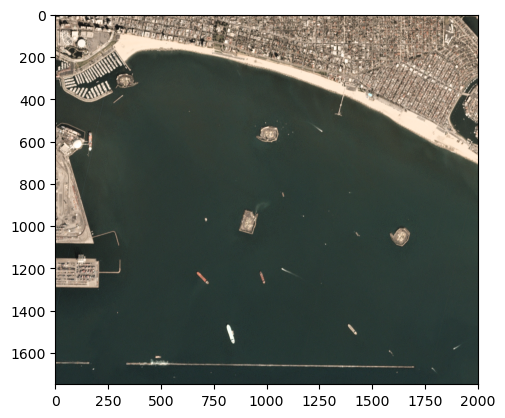

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'lb_1.png'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()


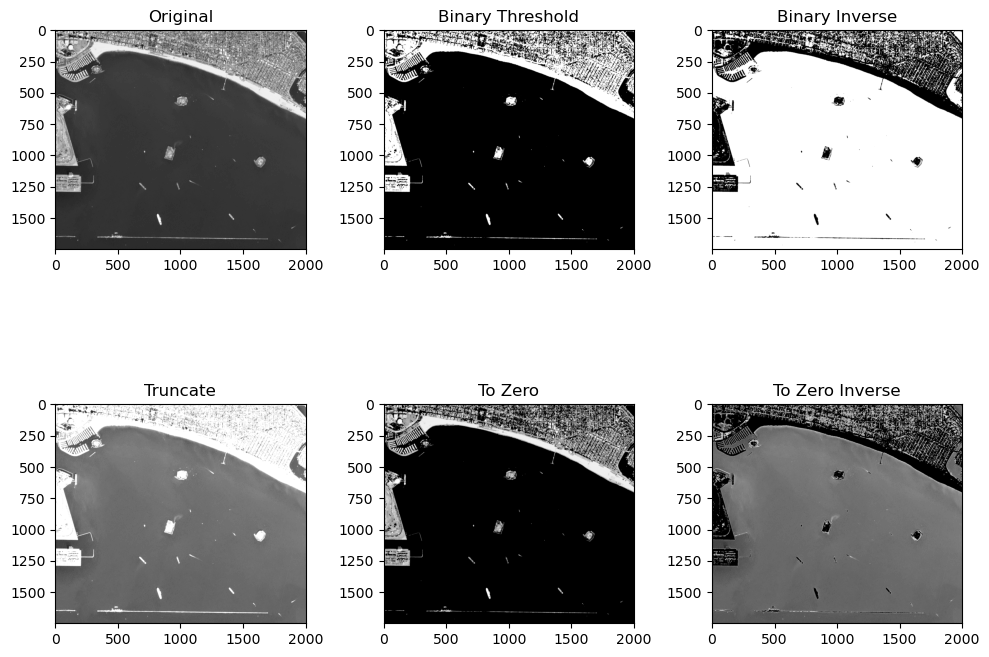

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Reading the image
img = cv2.imread(image_path, 0)  # 0 converts it to grayscale

# Applying different types of thresholding
ret, binary_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #Turns everything lighter than 127 gray shade to white and everything darker to black.
ret, binary_inv_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) #The opposite of binary thresholding—dark becomes white, and light becomes black.
ret, trunc_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) #pixel values above the threshold are set to the threshold value itself (127), and pixel values below the threshold remain unchanged.
ret, tozero_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)#pixels with values less than 127 are set to 0, and those with values greater than the threshold are left unchanged.
ret, tozero_inv_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)#pixels with values greater than the threshold are set to 0, while those with values less than or equal to the threshold are left unchanged.

# Displaying the original and thresholded images using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(2, 3, 2), plt.imshow(binary_thresh, cmap='gray'), plt.title('Binary Threshold')
plt.subplot(2, 3, 3), plt.imshow(binary_inv_thresh, cmap='gray'), plt.title('Binary Inverse')
plt.subplot(2, 3, 4), plt.imshow(trunc_thresh, cmap='gray'), plt.title('Truncate')
plt.subplot(2, 3, 5), plt.imshow(tozero_thresh, cmap='gray'), plt.title('To Zero')
plt.subplot(2, 3, 6), plt.imshow(tozero_inv_thresh, cmap='gray'), plt.title('To Zero Inverse')

plt.tight_layout()
plt.show()


In [ ]:
#region growing
import numpy as np
import cv2
 
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))
 
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
                    Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1),  Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects
 
def regionGrow(img,seeds,thresh,p = 1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)
 
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark

def Morphology_Erode(img, Erode_time=1):
    H, W = img.shape
    out = img.copy()
    # kernel
    MF = np.array(((0, 1, 0),
                   (1, 0, 1),
                   (0, 1, 0)), dtype=np.int)
    # each erode
    for i in range(Erode_time):
        tmp = np.pad(out, (1, 1), 'edge')
        # erode
        for y in range(1, H):
            for x in range(1, W):
                if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                    out[y, x] = 0
    return out


def Morphology_Dilate(img, Dil_time=1):
    H, W = img.shape
    # kernel
    MF = np.array(((0, 1, 0),
                   (1, 0, 1),
                   (0, 1, 0)), dtype=np.int)
    # each dilate time
    out = img.copy()
    for i in range(Dil_time):
        tmp = np.pad(out, (1, 1), 'edge')
        for y in range(1, H):
            for x in range(1, W):
                if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                    out[y, x] = 255
    return out


img = cv2.imread('ship22.png',0)
seeds = [Point(10,10),Point(70,70)]
binaryImg = regionGrow(img,seeds,2)
#binaryImg=Morphology_Erode(binaryImg)
#binaryImg=Morphology_Dilate(binaryImg)
cv2.imshow(' ',binaryImg)
cv2.waitKey(0)